## TECHNICAL TEST  - METRODATA

PT ABC adalah perusahaan yang bergerak di bidang produksi roti. Hasil produksi didistibusikan ke berbagai outlet atau store rekanan. Perusahaan tersebut kerap mengalami masalah karena banyak roti yang tidak terjual, sehingga produk retur karena kedalursa cukup banyak. Anda sebagai Data Scientist diminta untuk memberikan solusi berbasis machine learning yang dapat memberikan rekomendasi berupa jumlah unit roti atau order quantity yang sebaiknya dititipkan ke setiap outlet. Gunakan dataset terlampir dan lakukan demand forecasting per store secara harian. Point yg dinilai berupa presentasi hasil yang memuat:
1.	Hasil forecast untuk demand selama 7 hari dan 30 hari kedepan
2.	Penjelasan workflow machine learning yang dibuat
3.	Gunakan 2 jenis algoritma yaitu Time series dan Regresi dan masing-masing algoritma gunakan minimal 2 alternatif model
4.	Summary model performance 

In [10]:
# Import common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Read excel dataset
df = pd.read_excel("../raw/dataset.xls")

In [15]:
df.head()

,date,order_qty,product_id,store
0,20180626,0.416667,A1,7079
1,20180626,0.416667,A1,7088
2,20180609,0.208333,B2,7081
3,20180609,0.041667,B2,7081
4,20180609,0.041667,B2,7081


In [18]:
# Check missing values
df.isnull().sum()

date          0
order_qty     0
product_id    0
store         0
dtype: int64

In [19]:
# Check the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        17121 non-null  int64  
 1   order_qty   17121 non-null  float64
 2   product_id  17121 non-null  object 
 3   store       17121 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 535.2+ KB


In [29]:
# Typcasting date from "int" into "str" and change format into datetime
df['date'] = df['date'].astype('string')
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17121 non-null  datetime64[ns]
 1   order_qty   17121 non-null  float64       
 2   product_id  17121 non-null  object        
 3   store       17121 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 535.2+ KB


In [59]:
# Set index from date column
df.set_index('date', inplace=True)

In [60]:
# Typcasting store from "int" into "str"
df['store'] = df['store'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17121 entries, 2018-06-26 to 2017-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_qty   17121 non-null  float64
 1   product_id  17121 non-null  object 
 2   store       17121 non-null  string 
dtypes: float64(1), object(1), string(1)
memory usage: 535.0+ KB


In [61]:
df.describe()

,order_qty
count,17121.000000
mean,0.669138
std,1.446521
min,0.000000
25%,0.083333
50%,0.208333
75%,0.625000
max,25.000000


In [62]:
df['product_id'].unique()

array(['A1', 'B2', 'C3', 'D4', 'E5', 'F6', 'G7'], dtype=object)

In [63]:
df['store'].unique()

<StringArray>
['7079', '7088', '7081', '7082', '7084']
Length: 5, dtype: string

In [69]:
min_date = df.index.min()
max_date = df.index.max()
# diff_date = max_date - max_date

print(f"Tanggal mulai : {min_date}")
print(f"Tanggal akhir : {max_date}")
# print(f"Rentang waktu : {diff_date}")

Tanggal mulai : 2016-08-01 00:00:00
Tanggal akhir : 2018-12-01 00:00:00


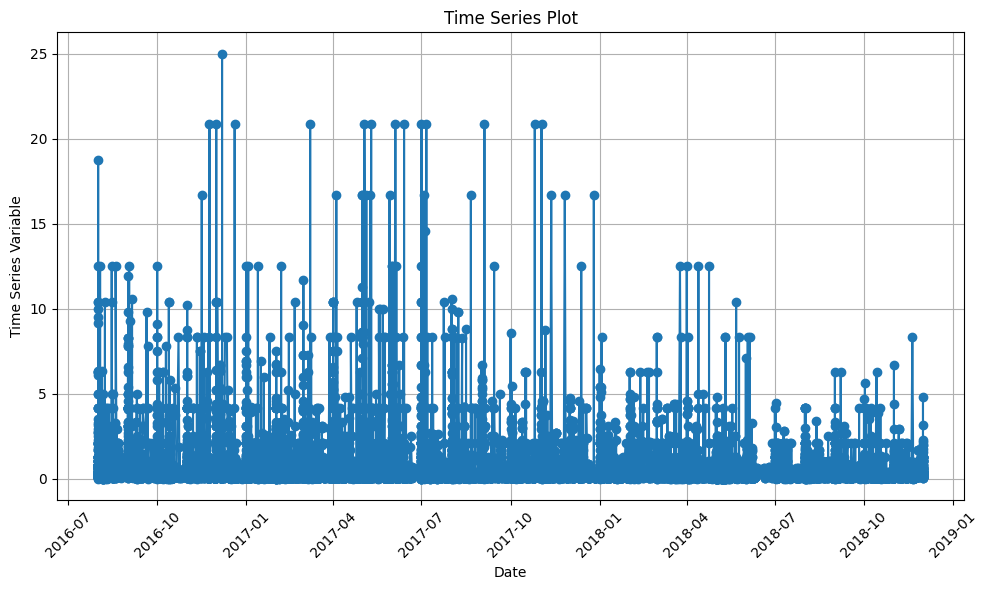

In [75]:
# Plot for "Daily" order
# Example DataFrame creation with datetime index
df_daily_plot = df.sort_index()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot the time series variable
plt.plot(df_daily_plot.index, df_daily_plot['order_qty'], marker='o', linestyle='-')

# Optional: Customize the plot (labels, title, etc.)
plt.xlabel('Date')
plt.ylabel('Time Series Variable')
plt.title('Time Series Plot')
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()


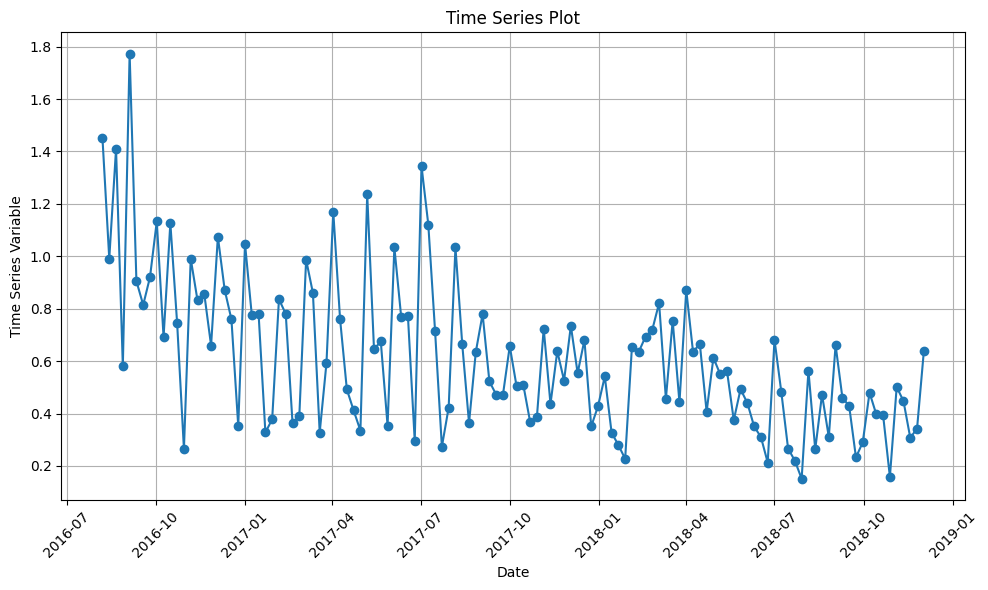

In [71]:
# Plot for "Weekly" order
# Example DataFrame creation with datetime index
date_resample_w = df.resample('W').mean()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot the time series variable
plt.plot(date_resample_w.index, date_resample_w['order_qty'], marker='o', linestyle='-')

# Optional: Customize the plot (labels, title, etc.)
plt.xlabel('Date')
plt.ylabel('Time Series Variable')
plt.title('Time Series Plot')
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()


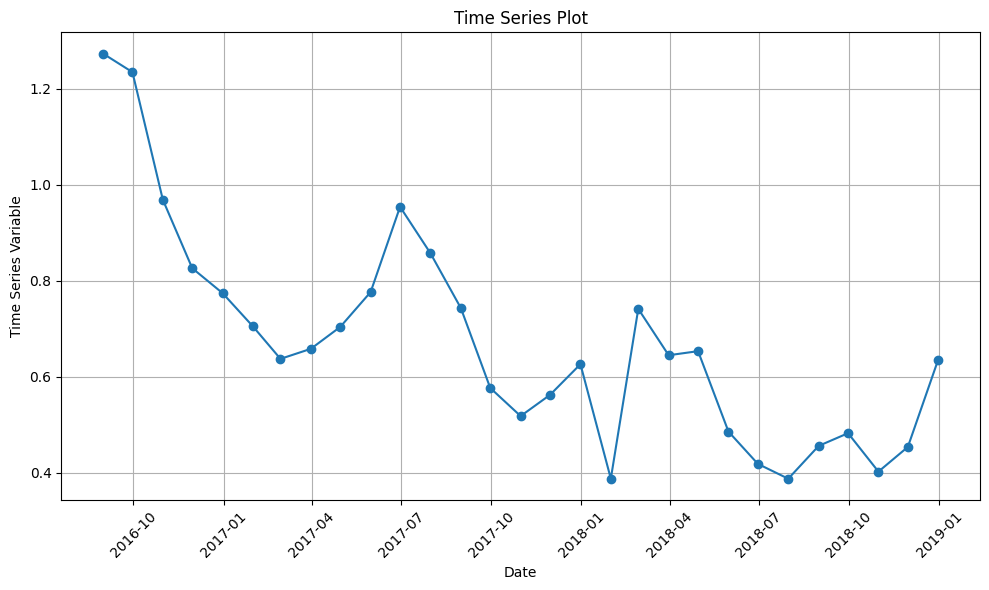

In [76]:
# Plot for "Monthly" order
# Example DataFrame creation with datetime index
date_resample_m = df.resample('M').mean()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot the time series variable
plt.plot(date_resample_m.index, date_resample_m['order_qty'], marker='o', linestyle='-')

# Optional: Customize the plot (labels, title, etc.)
plt.xlabel('Date')
plt.ylabel('Time Series Variable')
plt.title('Time Series Plot')
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()


#### Check lineplot order quantity for each product

In [78]:
df['product_id'].unique()

array(['A1', 'B2', 'C3', 'D4', 'E5', 'F6', 'G7'], dtype=object)

In [90]:
# Split dataframe for each product_id
g = globals()

for product in df['product_id'].unique():
    g[f'df_{product}'] = df[df['product_id'] == product].sort_index()
    print(f'Total rows in df_{product} :', len(g[f'df_{product}']))

Total rows in df_A1 : 1431
Total rows in df_B2 : 3744
Total rows in df_C3 : 221
Total rows in df_D4 : 1355
Total rows in df_E5 : 9255
Total rows in df_F6 : 667
Total rows in df_G7 : 448


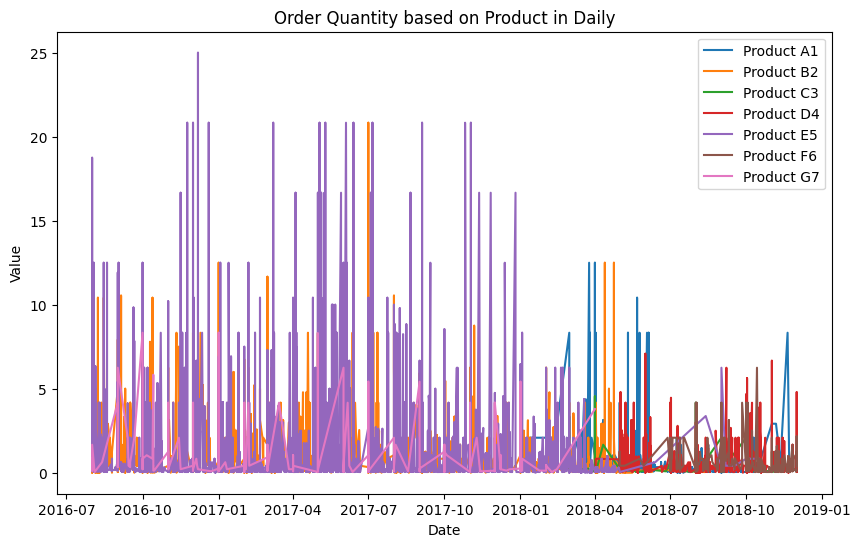

In [105]:
# Plot for "Daily" order
# Create Matplotlib figure and axes
plt.figure(figsize=(10, 6))
plt.plot(df_A1.index, df_A1['order_qty'], label='Product A1')
plt.plot(df_B2.index, df_B2['order_qty'], label='Product B2')
plt.plot(df_C3.index, df_C3['order_qty'], label='Product C3')
plt.plot(df_D4.index, df_D4['order_qty'], label='Product D4')
plt.plot(df_E5.index, df_E5['order_qty'], label='Product E5')
plt.plot(df_F6.index, df_F6['order_qty'], label='Product F6')
plt.plot(df_G7.index, df_G7['order_qty'], label='Product G7')

# Customize the plot
plt.title('Order Quantity based on Product in Daily')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

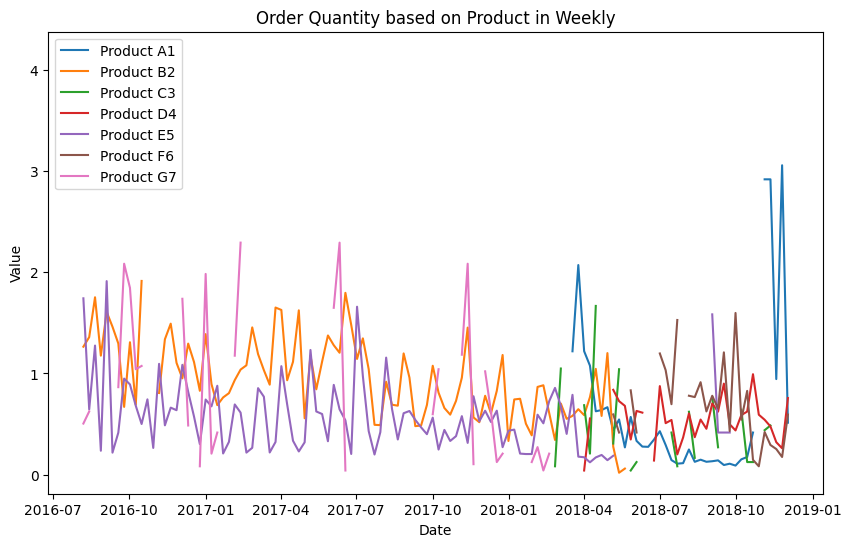

In [104]:
# Plot for "Weekly" order
for product in df['product_id'].unique():
    g[f'df_{product}_w'] = g[f'df_{product}'].resample('W').mean()

# Create Matplotlib figure and axes
plt.figure(figsize=(10, 6))
plt.plot(df_A1_w.index, df_A1_w['order_qty'], label='Product A1')
plt.plot(df_B2_w.index, df_B2_w['order_qty'], label='Product B2')
plt.plot(df_C3_w.index, df_C3_w['order_qty'], label='Product C3')
plt.plot(df_D4_w.index, df_D4_w['order_qty'], label='Product D4')
plt.plot(df_E5_w.index, df_E5_w['order_qty'], label='Product E5')
plt.plot(df_F6_w.index, df_F6_w['order_qty'], label='Product F6')
plt.plot(df_G7_w.index, df_G7_w['order_qty'], label='Product G7')

# Customize the plot
plt.title('Order Quantity based on Product in Weekly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

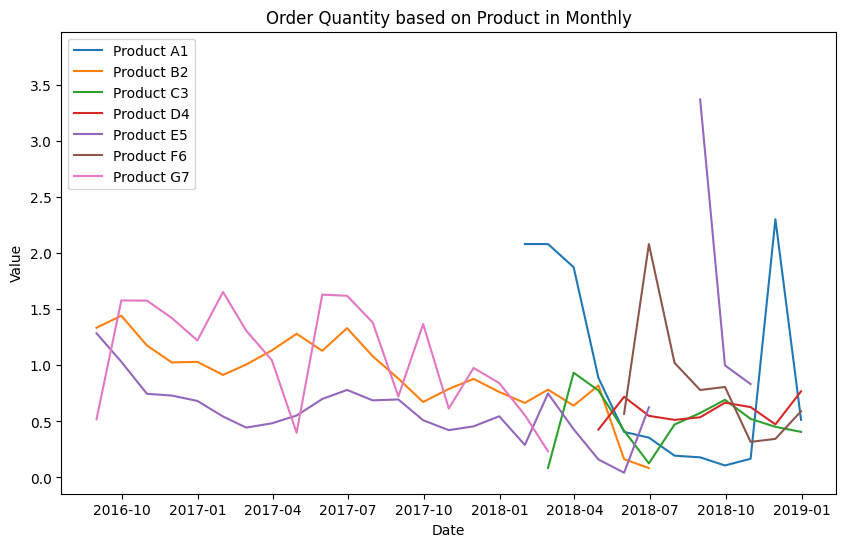

In [103]:
# Plot for "Mothly" order
for product in df['product_id'].unique():
    g[f'df_{product}_m'] = g[f'df_{product}'].resample('M').mean()

# Create Matplotlib figure and axes
plt.figure(figsize=(10, 6))
plt.plot(df_A1_m.index, df_A1_m['order_qty'], label='Product A1')
plt.plot(df_B2_m.index, df_B2_m['order_qty'], label='Product B2')
plt.plot(df_C3_m.index, df_C3_m['order_qty'], label='Product C3')
plt.plot(df_D4_m.index, df_D4_m['order_qty'], label='Product D4')
plt.plot(df_E5_m.index, df_E5_m['order_qty'], label='Product E5')
plt.plot(df_F6_m.index, df_F6_m['order_qty'], label='Product F6')
plt.plot(df_G7_m.index, df_G7_m['order_qty'], label='Product G7')

# Customize the plot
plt.title('Order Quantity based on Product in Monthly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

#### Check lineplot order quantity for each store

In [106]:
df['store'].unique()

<StringArray>
['7079', '7088', '7081', '7082', '7084']
Length: 5, dtype: string

In [ ]:
# Split dataframe for each store
g = globals()

for product in df['store'].unique():
    g[f'df_{product}'] = df[df['product_id'] == product].sort_index()
    print(f'Total rows in df_{product} :', len(g[f'df_{product}']))